When building a text summarizer or any other text-based model, text preprocessing, class imbalance checking, and exploratory data analysis (EDA) are crucial for several reasons. Even though your goal is to generate summaries, these steps help ensure that your model performs effectively and reliably. Here's is the reason why............
---

### 1. **Text Preprocessing:**
   Text data is often noisy and unstructured, so preprocessing helps to clean and standardize it, which is essential for machine learning models. In a text summarization task, preprocessing typically includes:
   - **Tokenization**: Splitting text into smaller units (tokens) so the model can process it.
   - **Stopwords removal**: Words like "is", "the", etc., do not carry much meaning for summarization and can be removed to focus on more important words.
   - **Lowercasing**: Ensures consistency, as "Text" and "text" should be treated as the same word.
   - **Lemmatization/Stemming**: Converts words to their base forms to avoid treating different forms of the same word as distinct, improving model accuracy.
   - **Handling punctuation and special characters**: These may not be needed for summarization unless specifically required (e.g., if they influence the meaning).

---
### 2. **Class Imbalance in Text Modeling:**
   Even in text summarization, imbalance can occur. For example, if certain types of documents (long scientific papers vs. short news articles) dominate your dataset, your model might perform poorly on underrepresented types. In tasks like text classification or summarization, class imbalance can cause the model to:
   - **Overfit on the majority class**: The model might generate better summaries for more frequent types of text while performing poorly on others.
   - **Misrepresent data distribution**: If your dataset has an imbalance between abstract lengths or text types, the model might learn to favor one pattern over others, leading to biased summaries.

  ---
### 3. **Exploratory Data Analysis (EDA):**
   EDA is crucial even for text summarization because it helps you understand the nature of the data you're working with. It can provide insights into:
   - **Word/character distributions**: Understanding common terms and their frequencies might reveal patterns that could impact the summarization process.
   - **Sentence length distributions**: Shorter texts might require different summarization strategies than longer ones, and EDA helps identify this.
   - **Outliers**: You may have outliers (e.g., extremely long articles) that could skew your model’s performance, and identifying these helps ensure fair evaluation.
   - **Patterns in structure**: Some texts may have specific formats (e.g., journal abstracts vs. opinion pieces), and EDA helps uncover such structural elements that could influence the summarization.

  ---
### 4. **Other Tasks like Feature Extraction:**
   - **Sentence Embeddings**: For summarization models, embedding text into meaningful vectors allows the model to understand semantic content. Without proper feature extraction, the summarizer won't understand the context well.
   - **Stopword and Keyword Identification**: Identifying keywords or key phrases can help build better summaries by focusing on core content rather than filler words.



In [1]:
!pip install datasets pandas matplotlib wordcloud seaborn nltk



INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.7 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framewor

In [3]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Download required resources for nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
dataset = load_dataset('ccdv/pubmed-summarization', split='train')

# Convert to DataFrame and select only 50000 rows
df = pd.DataFrame(dataset[:50000])

# Display initial rows for verification
print(df.head())

# NLP Preprocessing steps
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove punctuation and special characters
    text = re.sub(r'\W', ' ', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenization
    words = word_tokenize(text)
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing
df['x_cleaned'] = df['article'].apply(preprocess_text)
df['y_cleaned'] = df['abstract'].apply(preprocess_text)

# Save cleaned data for EDA
df.to_csv('cleaned_stratified_sample.csv', index=False)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                             article  \
0  a recent systematic analysis showed that in 20...   
1  it occurs in more than 50% of patients and may...   
2  tardive dystonia ( td ) , a rarer side effect ...   
3  lepidoptera include agricultural pests that , ...   
4  syncope is caused by transient diffuse cerebra...   

                                            abstract  
0  background : the present study was carried out...  
1  backgroundanemia in patients with cancer who a...  
2  tardive dystonia ( td ) is a serious side effe...  
3  many lepidopteran insects are agricultural pes...  
4  we present an unusual case of recurrent cough ...  


In [ ]:
import pandas as pd
import numpy as np
import csv  # Import the csv module for quoting options

# Column names for the text and summary columns
column_name = 'article'  # The main text column
summary_column = 'abstract'  # The target column for the summarized text

if column_name in df_cleaned.columns and summary_column in df_cleaned.columns:
    # Add a column for article length
    df_cleaned['paragraph_length'] = df_cleaned[column_name].apply(len)
else:
    raise ValueError(f"Columns '{column_name}' or '{summary_column}' not found. Please verify the column names.")

# Proceed only if the column exists and has been processed correctly
if 'paragraph_length' in df_cleaned.columns:
    # Define bins for stratified sampling based on paragraph length
    bins = [0, 50, 100, 200, 300, 500, 1000, np.inf]
    labels = ['0-50', '51-100', '101-200', '201-300', '301-500', '501-1000', '1000+']
    df_cleaned['length_bin'] = pd.cut(df_cleaned['paragraph_length'], bins=bins, labels=labels)

    # Calculate the proportionate number of samples per bin to total 50000 rows
    total_rows = 50000
    bin_counts = df_cleaned['length_bin'].value_counts()
    bin_proportions = bin_counts / bin_counts.sum()
    bin_sample_sizes = (bin_proportions * total_rows).round().astype(int)

    # Stratified sampling based on calculated sample sizes
    sampled_df_cleaned = pd.concat([
        df_cleaned[df_cleaned['length_bin'] == bin].sample(n=min(bin_sample_sizes[bin], len(df_cleaned[df_cleaned['length_bin'] == bin])), random_state=42)
        for bin in bin_sample_sizes.index
    ])

    # Adjust the sample size to exactly 50000 rows if needed
    if len(sampled_df_cleaned) > 50000:
        sampled_df_cleaned = sampled_df_cleaned.sample(n=50000, random_state=42)
    elif len(sampled_df_cleaned) < 50000:
        additional_samples_needed = 50000 - len(sampled_df_cleaned)
        additional_samples = df_cleaned.sample(n=additional_samples_needed, random_state=42)
        sampled_df_cleaned = pd.concat([sampled_df_cleaned, additional_samples])

    # Retain only the two required columns: 'article' and 'summary'
    sampled_df_cleaned = sampled_df_cleaned[[column_name, summary_column]]

    # Save the cleaned, stratified data to a new CSV file, handling commas properly
    output_file_path = 'cleaned_stratified_sample.csv'
    sampled_df_cleaned.to_csv(output_file_path, index=False, encoding='utf-8', quotechar='"', quoting=csv.QUOTE_ALL)

    print(f"Cleaned stratified sample saved to: {output_file_path}")
else:
    raise RuntimeError("Paragraph length column could not be created. Please check the column name.")


Cleaned stratified sample saved to: cleaned_stratified_sample.csv


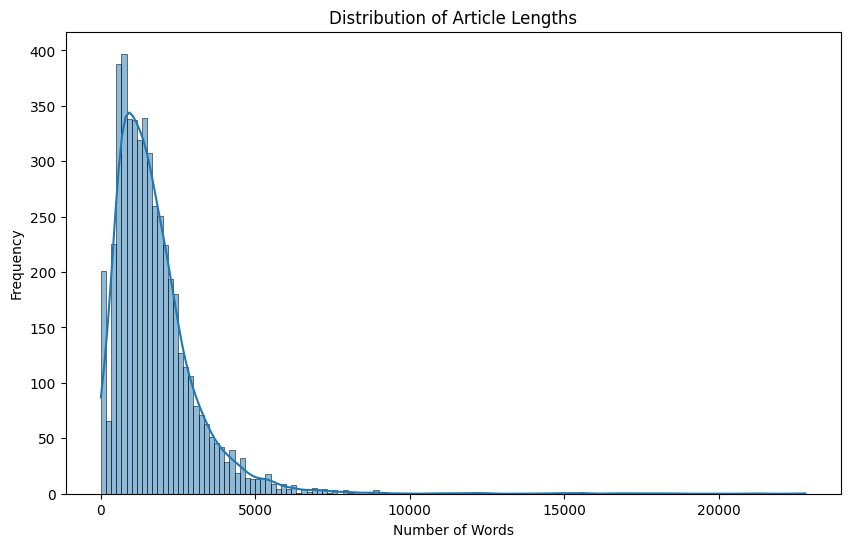

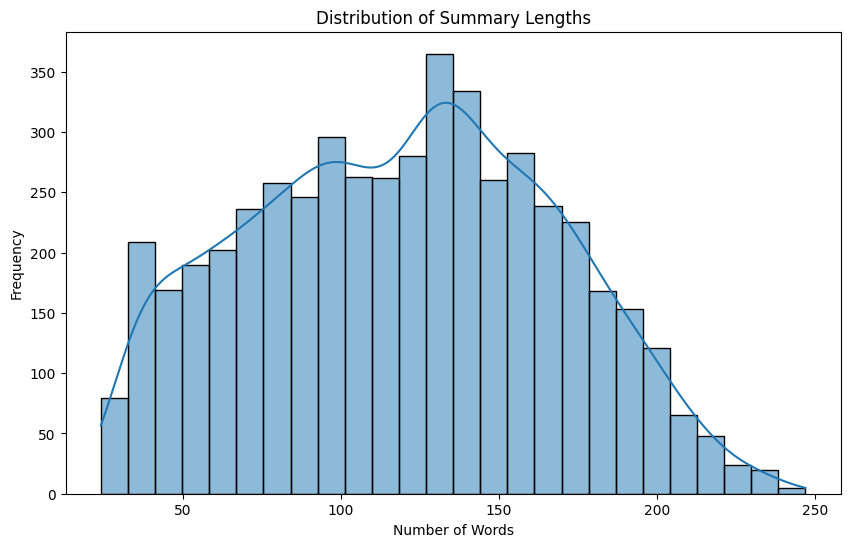

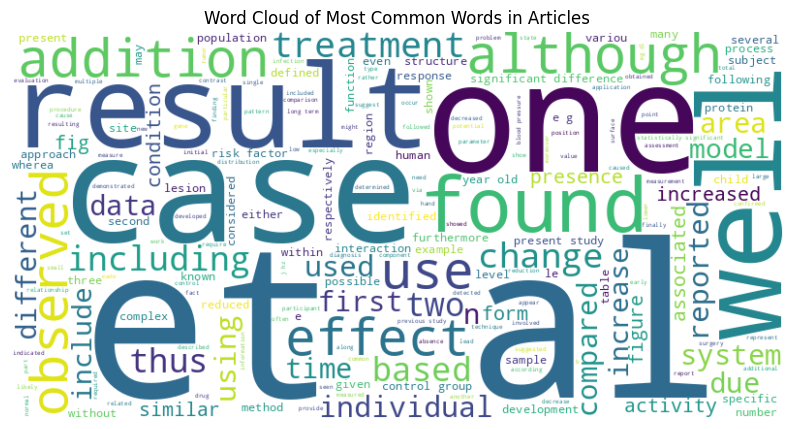

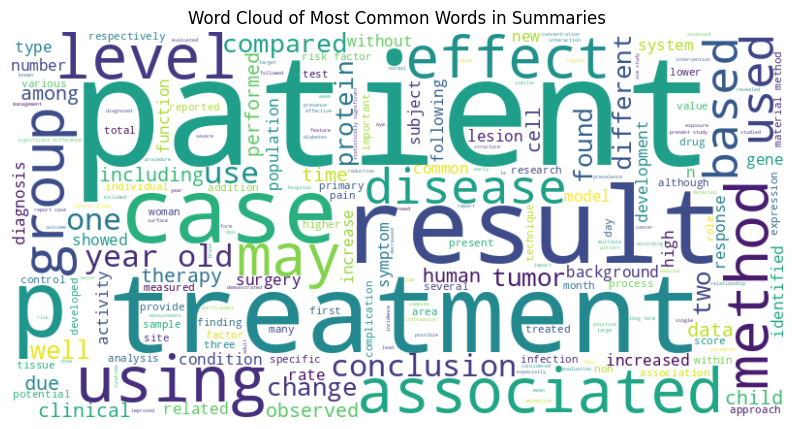

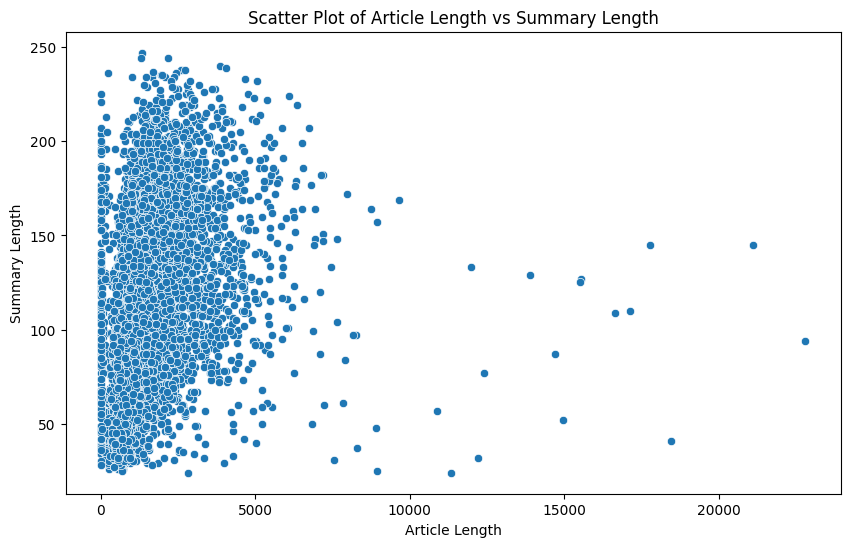

In [4]:

# Length distributions
df['article_length'] = df['x_cleaned'].apply(lambda x: len(x.split()))
df['summary_length'] = df['y_cleaned'].apply(lambda x: len(x.split()))

# Plotting article length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['article_length'], kde=True)
plt.title('Distribution of Article Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Plotting summary length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['summary_length'], kde=True)
plt.title('Distribution of Summary Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Word cloud for most common words in articles
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['x_cleaned']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words in Articles')
plt.show()

# Word cloud for most common words in summaries
wordcloud_summary = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['y_cleaned']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_summary, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words in Summaries')
plt.show()

# Scatter plot for article vs summary length
plt.figure(figsize=(10, 6))
sns.scatterplot(x='article_length', y='summary_length', data=df)
plt.title('Scatter Plot of Article Length vs Summary Length')
plt.xlabel('Article Length')
plt.ylabel('Summary Length')
plt.show()
